In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('Downloads/HR_comma_sep.csv')

In [31]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [32]:
df[df['left']==1].shape

(3571, 10)

In [33]:
df[df['left']==0].shape

(11428, 10)

In [34]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [35]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
df.groupby('left').mean()

/var/folders/3d/xd2j8v9940q4g7kc9mpsnln80000gn/T/ipykernel_21609/588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary', ylabel='count'>

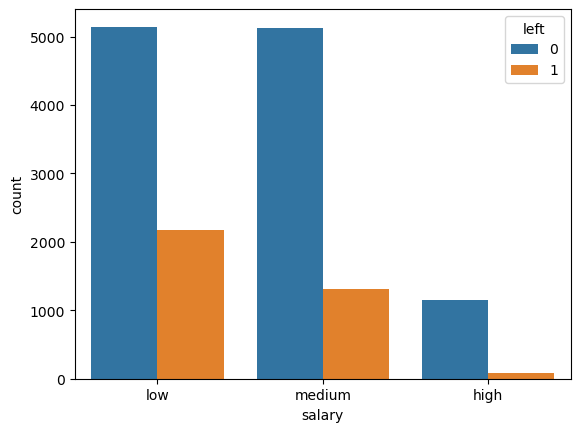

In [44]:
sns.countplot(x='salary',data=df,hue='left')

<Axes: xlabel='Department', ylabel='count'>

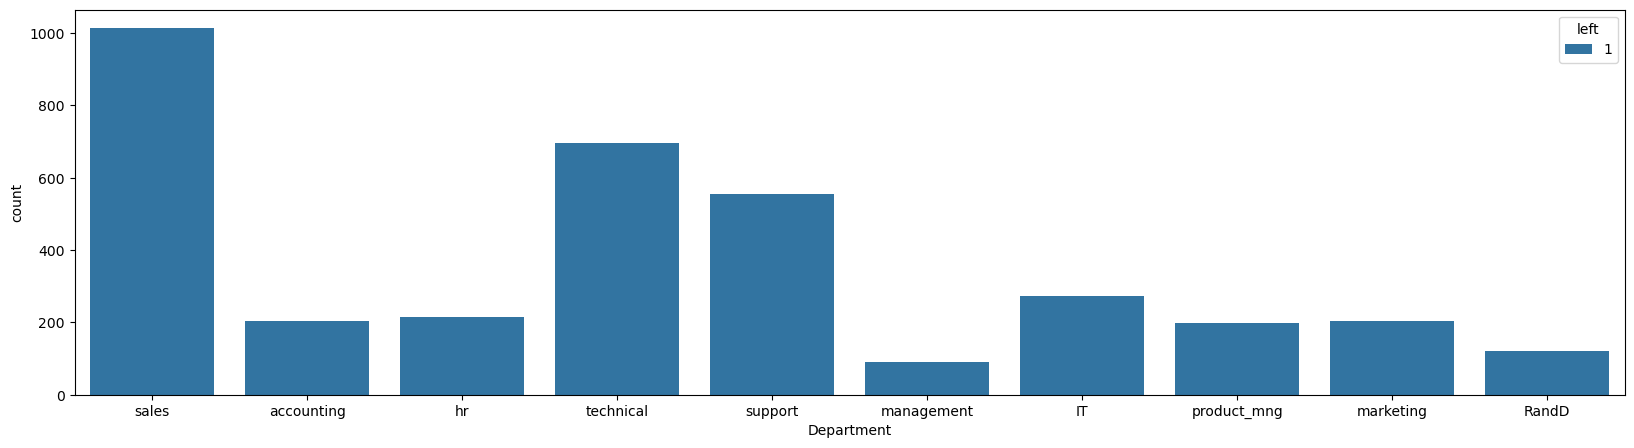

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(x='Department',data=df[df['left']==1],hue='left')

In [47]:
df.drop(columns=['last_evaluation','number_project','time_spend_company','Work_accident','Department'],inplace=True)

In [51]:
dummies  = pd.get_dummies(df['salary'])

In [52]:
df = pd.concat([df,dummies],axis=1)

In [74]:
# Dropping string values and one dummy column to decrease error

In [55]:
df.drop(columns=['salary','medium'],inplace=True)

In [56]:
df

,satisfaction_level,average_montly_hours,left,promotion_last_5years,high,low
0,0.38,157,1,0,0,1
1,0.80,262,1,0,0,0
2,0.11,272,1,0,0,0
3,0.72,223,1,0,0,1
4,0.37,159,1,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,1,0,0,1
14995,0.37,160,1,0,0,1
14996,0.37,143,1,0,0,1
14997,0.11,280,1,0,0,1


In [65]:
X=df[['satisfaction_level','average_montly_hours','promotion_last_5years','high','low']]
Y= df['left']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [69]:
model = linear_model.LogisticRegression()

In [70]:
model.fit(X_train,Y_train)

LogisticRegression()

In [71]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
model.score(X_test,Y_test)

0.7806666666666666